# Export Data

In [19]:
%load_ext autoreload
%autoreload 2
from dimension_reduction import *
import numpy as np
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# takes about 1.5m to run this
root_folder = 'asset/MET'
images_array = load_images_from_folders(root_folder)
flattened_color = np.array([image.flatten() for image in images_array])

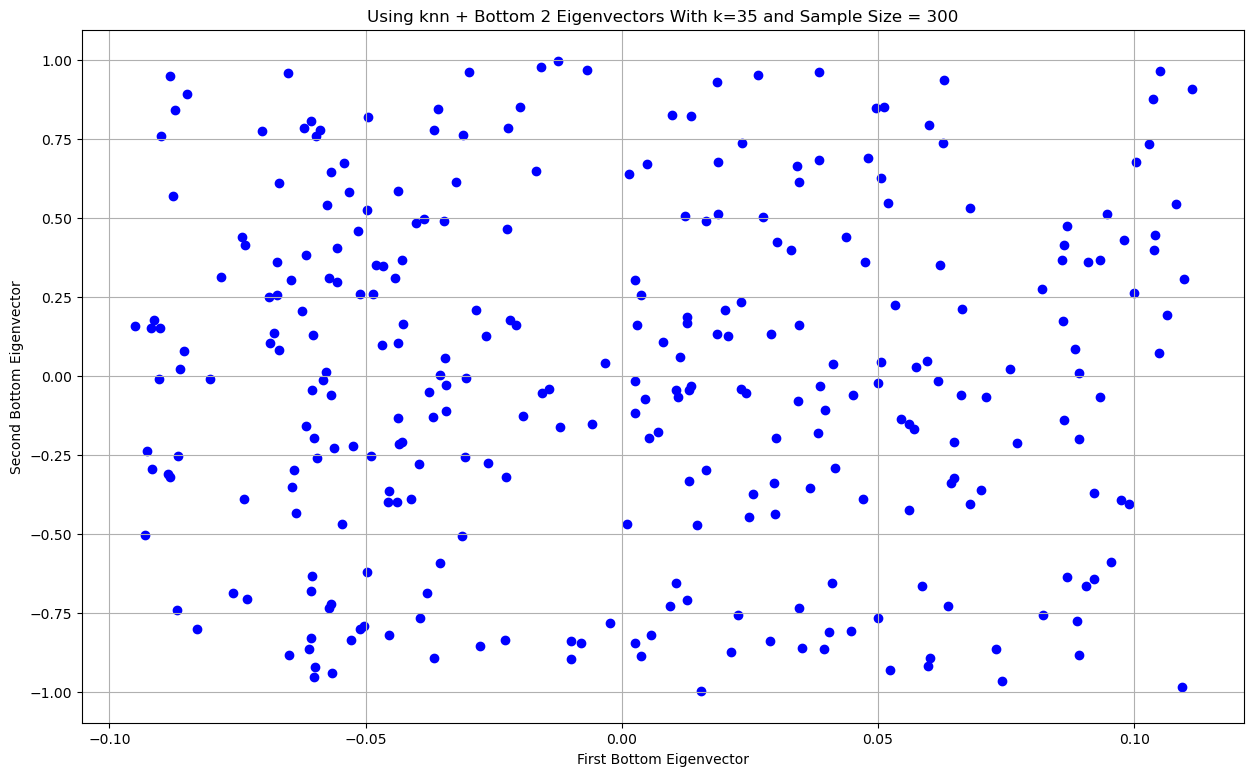

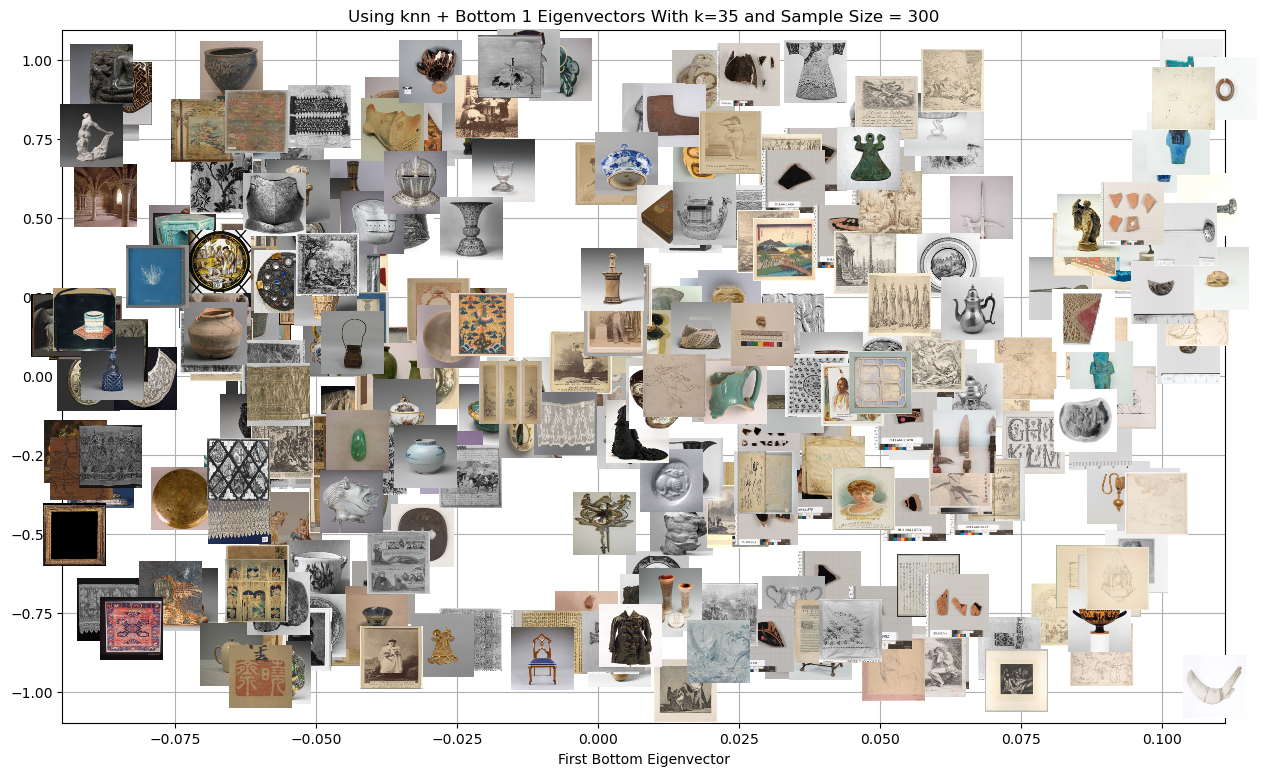

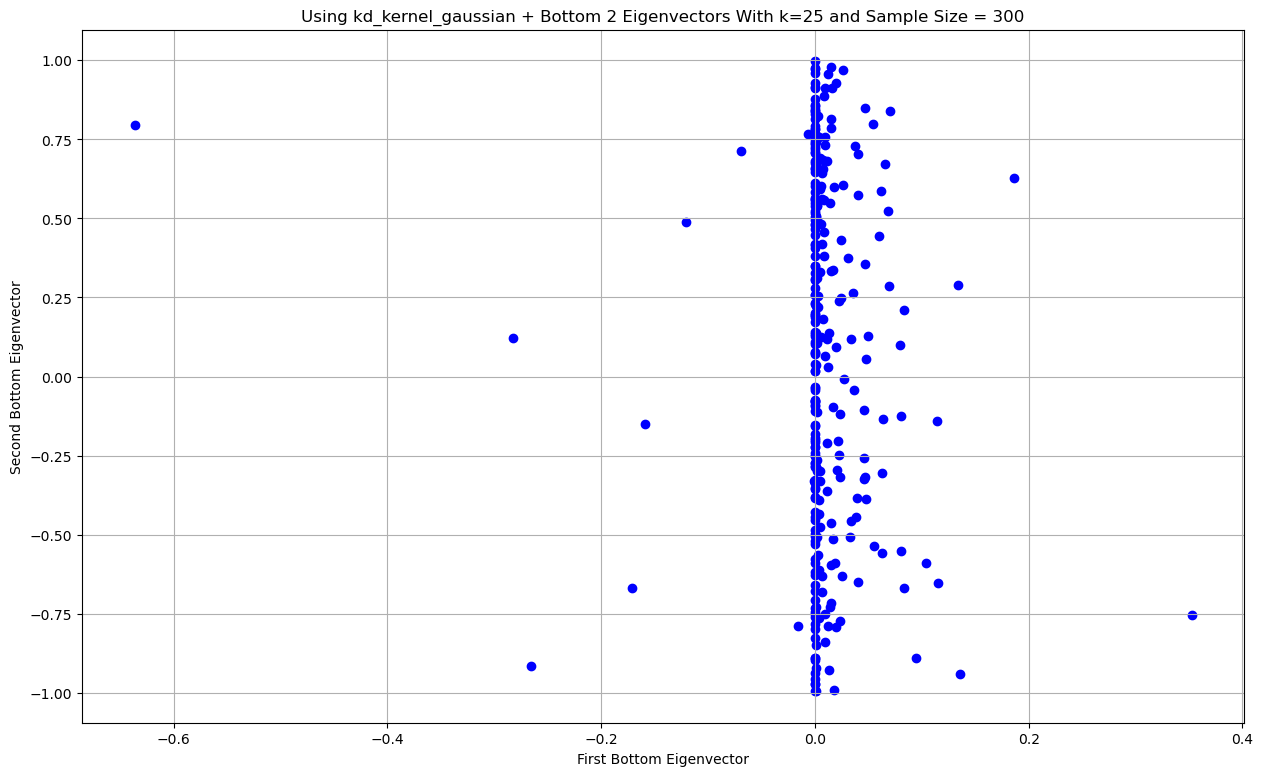

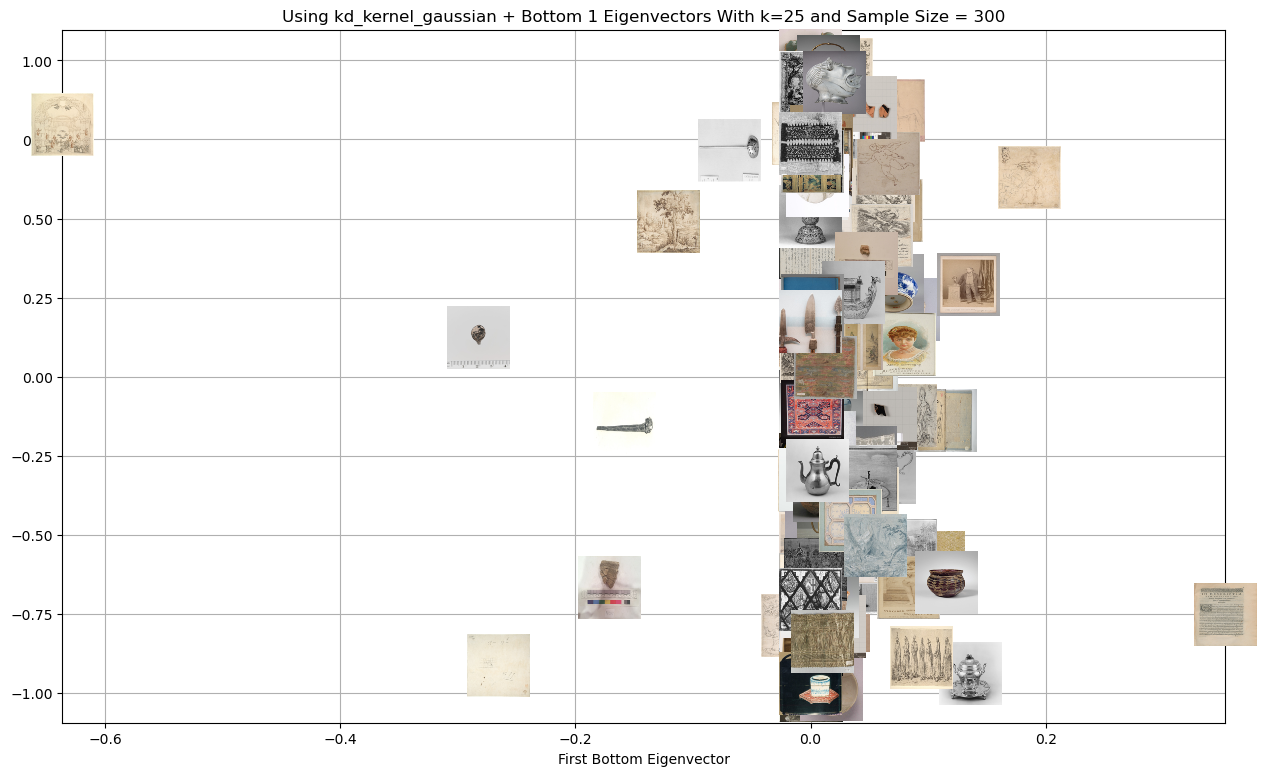

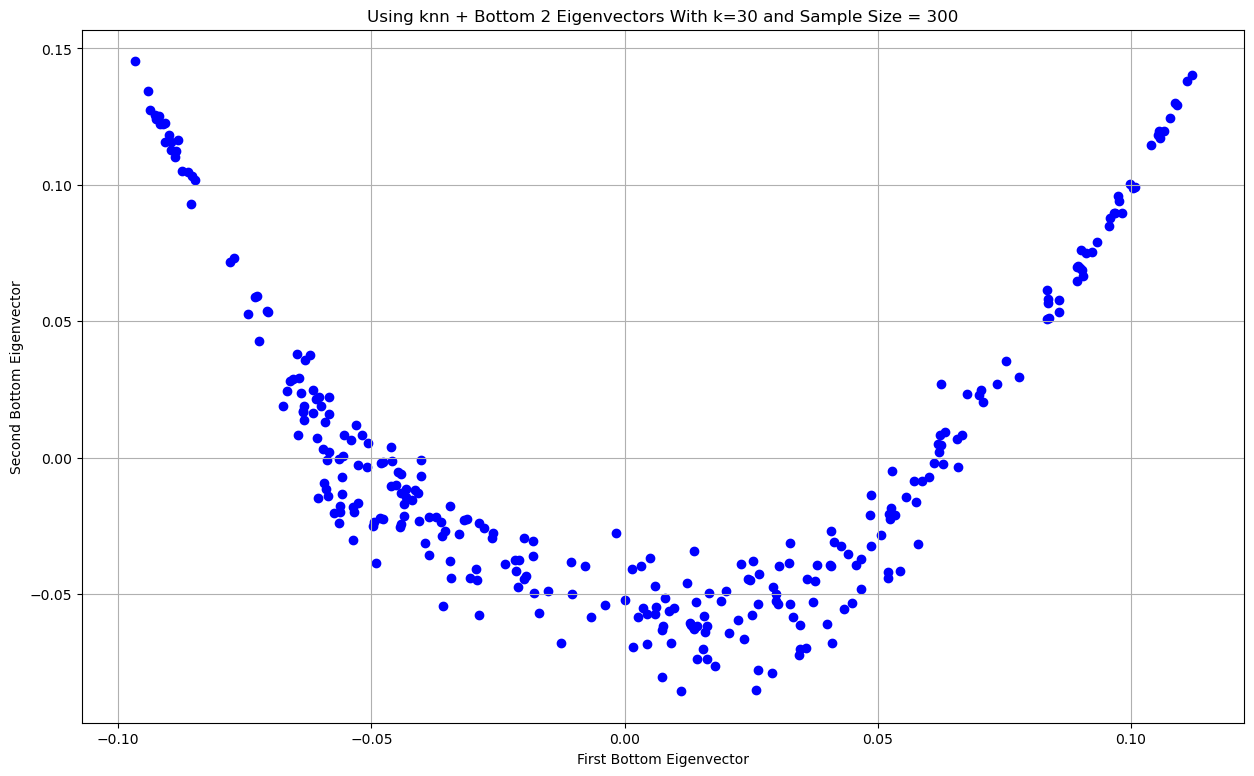

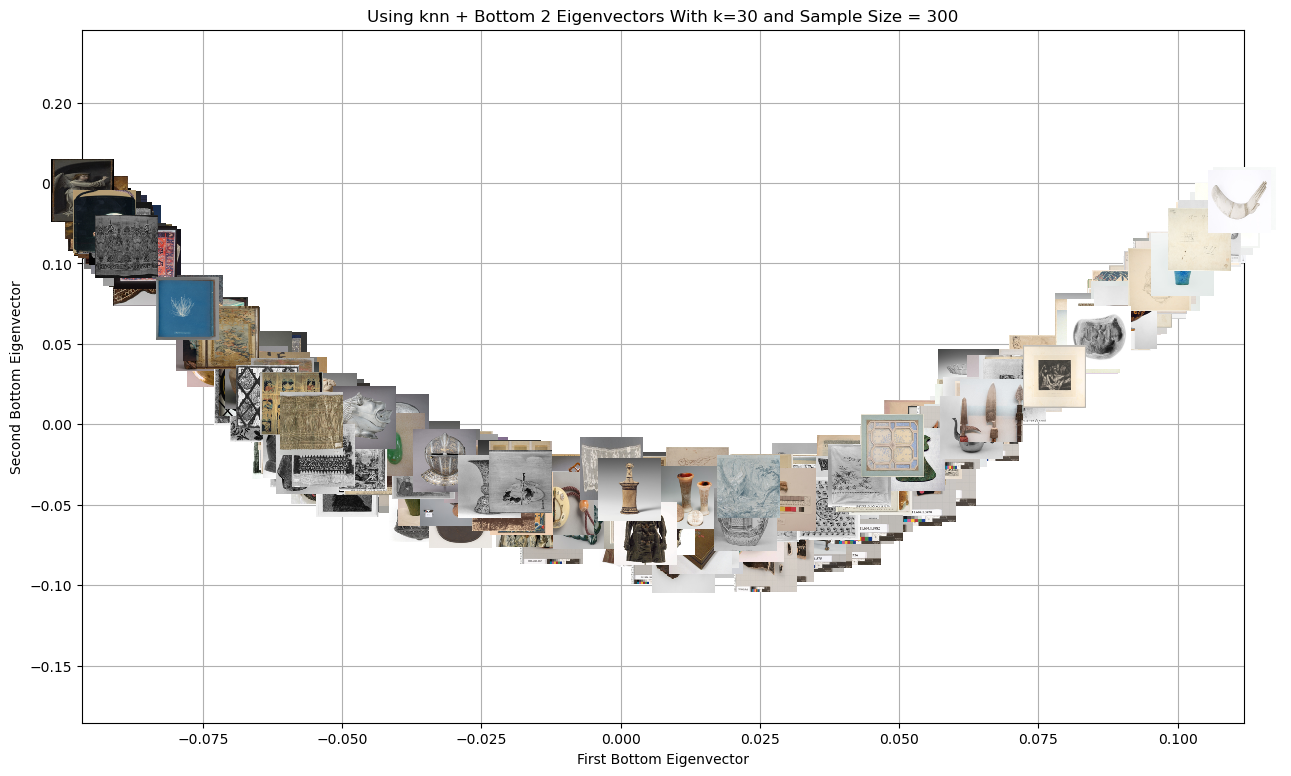

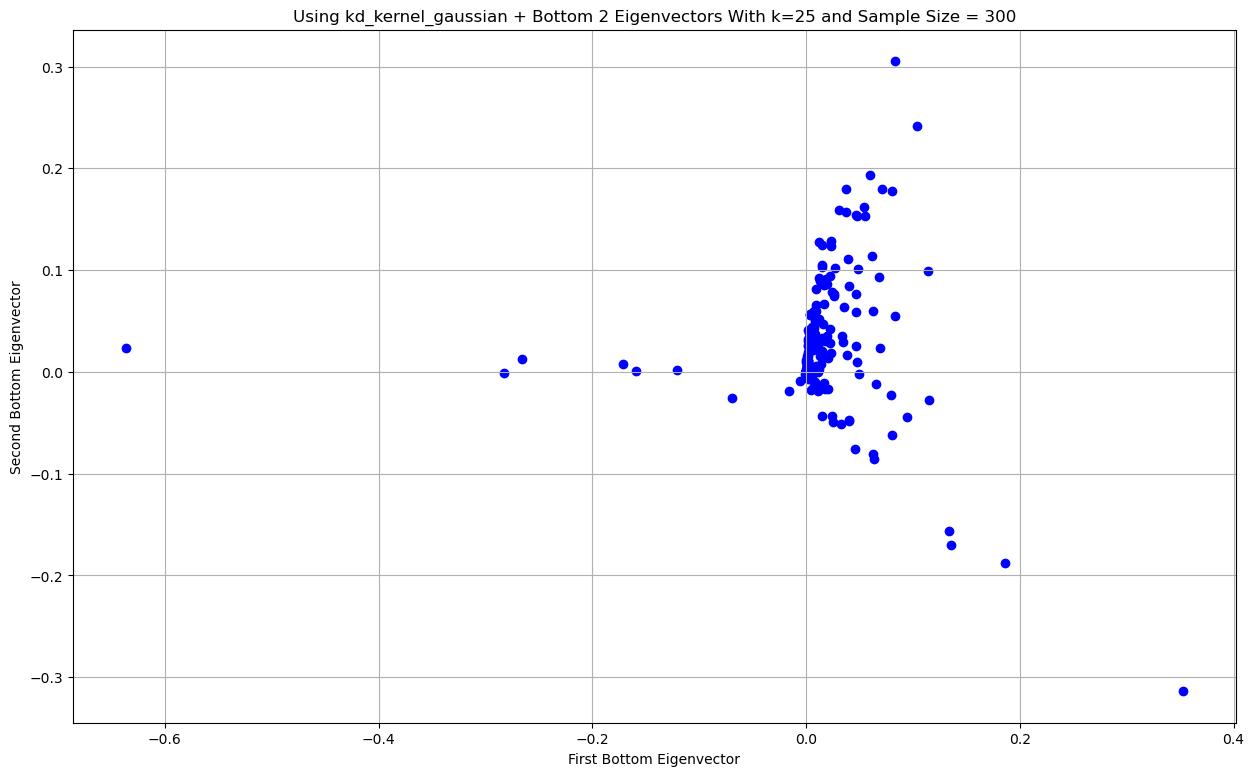

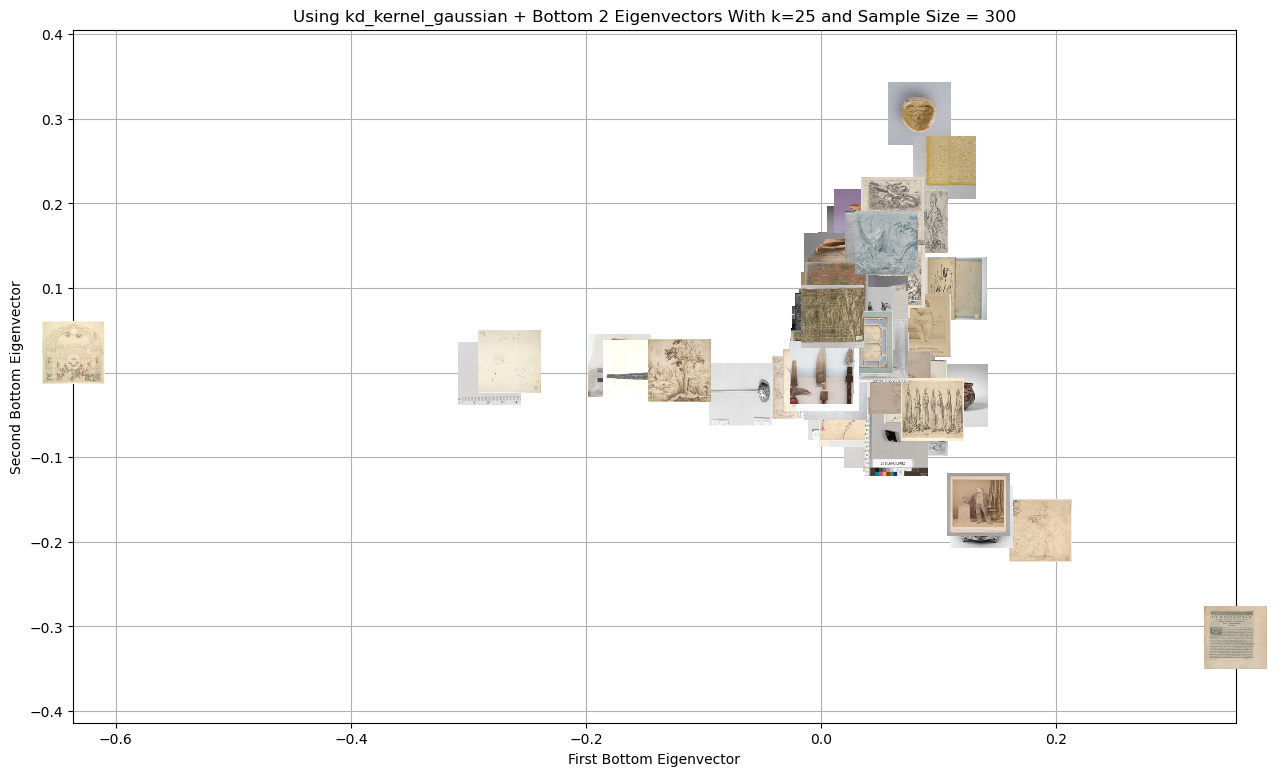

In [17]:
np.random.seed(123)
rngs = np.random.choice(30000, 300)
sample = np.array([flattened_color[rng] for rng in rngs])
knn_sol_1e, knn_W_1e = laplacian_eigenmap(sample, k=35, image_dim=128, radial_func='knn', one_dim=True, num_eigen=0)
gau_sol_1e, gau_W_1e = laplacian_eigenmap(sample, k=25, image_dim=128, radial_func='kd_kernel_gaussian', one_dim=True, num_eigen=0)
knn_sol_2e, knn_W_2e = laplacian_eigenmap(sample, k=30, image_dim=128, radial_func='knn')
gau_sol_2e, gau_W_2e = laplacian_eigenmap(sample, k=25, image_dim=128, radial_func='kd_kernel_gaussian')

In [26]:
def convert_json(sol, name):
    array_list = sol.tolist()
    json_data = json.dumps(array_list)
    print(json_data)

    with open(f'export/{name}.json', 'w') as f:
        json.dump(array_list, f)

In [27]:
convert_json(knn_sol_1e, 'knn1e')
convert_json(gau_sol_1e, 'gau1e')
convert_json(knn_sol_2e, 'knn2e')
convert_json(gau_sol_2e, 'gau2e')

[0.02012039440720932, -0.05463608415324475, -0.030957920204440062, 0.012734549962654051, -0.06040228608411896, 0.01055093939907354, 0.0037936498804263252, -0.03808913663231181, 0.06479535475554812, 0.0025790018332861875, -0.04289383675537206, 0.09538082322197955, 0.02317146027569278, 0.04960121004287321, -0.009924478056989233, -0.03434838760421174, 0.10391619356554074, -0.022780432591723593, 0.06274509204673007, -0.0436458945302506, -0.09039698058881757, -0.08028630910707481, -0.05951867158239269, -0.035886000442538445, 0.03853996395438943, -0.04434720469343364, 0.004450169679318093, -0.060210208242250506, 0.056136637178363855, 0.05602261818170761, 0.014663880839008964, -0.06157298081960502, 0.03412004211792716, 0.012734549962654244, 0.07102810273910472, -0.046630540560810216, -0.04339646021373032, -0.055561469679494276, 0.018605396441442275, -0.04540491273827469, 0.08917563429835369, -0.02188824321716737, 0.027583234076756304, 0.07574964314997981, -0.08710608319120249, 0.0975022708643

In [28]:
def adjacency_to_d3_json(adjacency_matrix, name):
    """
    Converts an adjacency matrix to a JSON file format for use with D3.js.

    Args:
    adjacency_matrix (numpy.ndarray): A square adjacency matrix.
    output_filename (str): The file to which to write the JSON output.
    """
    num_nodes = adjacency_matrix.shape[0]
    nodes = [{'id': str(i), 'group': 1} for i in range(num_nodes)]
    links = []

    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i, j] != 0:  # assuming 0 means no edge
                links.append({'source': str(i), 'target': str(j), 'value': adjacency_matrix[i, j]})

    graph = {'nodes': nodes, 'links': links}

    with open(f'export/{name}.json', 'w') as f:
        json.dump(graph, f, indent=4)

    return graph

In [30]:
knn_W_1e

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [29]:
adjacency_to_d3_json(knn_W_1e, 'knnW1e.json')
adjacency_to_d3_json(gau_W_1e, 'gauW1e.json')
adjacency_to_d3_json(knn_W_2e, 'knnW2e.json')
adjacency_to_d3_json(gau_W_2e, 'gauW2e.json')

{'nodes': [{'id': '0', 'group': 1},
  {'id': '1', 'group': 1},
  {'id': '2', 'group': 1},
  {'id': '3', 'group': 1},
  {'id': '4', 'group': 1},
  {'id': '5', 'group': 1},
  {'id': '6', 'group': 1},
  {'id': '7', 'group': 1},
  {'id': '8', 'group': 1},
  {'id': '9', 'group': 1},
  {'id': '10', 'group': 1},
  {'id': '11', 'group': 1},
  {'id': '12', 'group': 1},
  {'id': '13', 'group': 1},
  {'id': '14', 'group': 1},
  {'id': '15', 'group': 1},
  {'id': '16', 'group': 1},
  {'id': '17', 'group': 1},
  {'id': '18', 'group': 1},
  {'id': '19', 'group': 1},
  {'id': '20', 'group': 1},
  {'id': '21', 'group': 1},
  {'id': '22', 'group': 1},
  {'id': '23', 'group': 1},
  {'id': '24', 'group': 1},
  {'id': '25', 'group': 1},
  {'id': '26', 'group': 1},
  {'id': '27', 'group': 1},
  {'id': '28', 'group': 1},
  {'id': '29', 'group': 1},
  {'id': '30', 'group': 1},
  {'id': '31', 'group': 1},
  {'id': '32', 'group': 1},
  {'id': '33', 'group': 1},
  {'id': '34', 'group': 1},
  {'id': '35', 'group